### lab 8 - Genome sequencing and assembly
Take the reads and combine them into a complete genome

### Question handling
1. Why do we expect short reads to produce a more fragmented assembly than long reads?
Compared to long reads, short reads can not span low complexity and repeats in a DNA sequence, which leads to ambiguity of either locating the read on a reference interms of their orientation and order, or using overlaps between reads.
2. Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina
Let's tale the example of Oxford Nanopore Technologies to explain wht long reads is a error-prone process. This technology is based on passing a single strand of DNA through a nanpore with an enzyme attached, and measuring changes in the electrical signal accross the pore. As the pore holds several bases at a time, overlapping k-mers that cause changes in raw current must e inferred and used to make base calls, a process can be error prone. Over a long sequence reads, for sure the error would be accumulated and be higher that the short reads. (_Reference:Long reads: their purpose and place_)

### Run SPAdes inside a "screen"
To start a screen, type "screen" in the terminal
To leave screen temporatily, press "Ctrl-a" then press "d"
To reattach to screen, use command of "screen -ls" to list all screens and then use screen -r SESSION_NUMBER to reattach one of them specifially
spades -t 1 -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq -o ./genomeassembly.output

### Generate assembly statistics


In [10]:
import subprocess
proc = subprocess.run(['assembly-stats', 'genomeassembly.output/contigs.fasta'],\
                      input=None, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
for line in proc.stdout.decode().split('\n'): 
    print(line)

stats for genomeassembly.output/contigs.fasta
sum = 6678635, n = 176, ave = 37946.79, largest = 414008
N50 = 234690, n = 11
N60 = 202142, n = 14
N70 = 154232, n = 18
N80 = 103367, n = 23
N90 = 81286, n = 30
N100 = 128, n = 176
N_count = 0
Gaps = 0



In [11]:
import subprocess
proc = subprocess.run(['assembly-stats', 'genomeassembly.output/scaffolds.fasta'],\
                      input=None, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
for line in proc.stdout.decode().split("\n"): 
    print(line)

stats for genomeassembly.output/scaffolds.fasta
sum = 6678655, n = 174, ave = 38383.07, largest = 414008
N50 = 234690, n = 11
N60 = 202142, n = 14
N70 = 154232, n = 18
N80 = 103367, n = 23
N90 = 81821, n = 30
N100 = 128, n = 174
N_count = 20
Gaps = 2



### Question handling
1. why is N50 is useful stastic to calculate? 
The N50 can be described as a weighted median stastic such thta 50% of the entire assembly is contained in contigs equal to or larger than this value. Median cotig length can not give information how long/short the config is larger/smaller than the median cotig length. Mean contig length can be described as a number average but does not including information like how many congigs have length below/above the mean contig length.
2. In your assembly, are scaffolds larger than configs, or are scaffolds approximately equal to contigs?
The sum of scaffolds equals to that of contigs, but the number of scaffolds is slightly smaller than that of contigs. Two gaps mean it happens twice that the assembler can't tell what sequence connects two contigs in a scaffold. 


### Extra Credit
Extract the coverage form each FASTA header and plot a histogram of coverage fro all contigs in your assembly 

In [57]:
import re
line="NODE_1_length_414008_cov_7.740928"
coverage = re.findall(r"(?<=_cov_)[0-9.]+", line)[0]
print(coverage)

7.740928


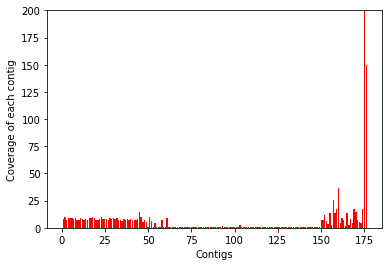

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import re


coverage = []
contig_infile = open('genomeassembly.output/contigs.fasta')
for line in contig_infile.readlines() :
    if line[0] == '>' :
        times = float(re.findall(r"(?<=_cov_)[0-9.]+", line)[0]) #?<=... Matches if the current position in the string is preceded by a match for ... that ends at the current position
        coverage.append(times)
hist=plt.bar(range(1,177),coverage,color="red")
plt.ylim(0,200)# There is only one contig with coverage larger than 200, to get a high resolution of the coverage distribution, I set the y range from 0 to 200
plt.xlabel('Contigs')
_=plt.ylabel('Coverage of each contig')



### Question handling
1. Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal?
Geometric distribution would be a better way to describe the this distribution. Or it kind of like bimodal distribution if we count the region below 55 as a peak, then there are two peaks in this distribution.
2. What explains the presence of contigs with coverage an integer multiple of the mean coverage?
I am not sure what are you really asking.

### Identify the taxon from which your genome originated
To identify your genome,
1. scan over the entire genome to locate copies of the 16S ribosomal RNA gene
2. extract the 16S RNA genes from your assembly
3. compare these genes to a database of known 16S rRNA genes
```
rna_hmm3.py -i genomeassembly.output/contigs.fasta -o rrna.gff
```
```
bedtools getfasta -fi genomeassembly.output/contigs.fasta -bed rrna.gff > rrna.fasta
```

Head over to [ribosomal database project's seqmatch tool](http://rdp.cme.msu.edu/seqmatch/seqmatch_intro.jsp), upload the resulting FASTA file from the previous step. Below is the result,
![Seqmatch_result](Seqmatch.png)

According to result, since we has mentioned it is bacterial genome, thus apparently, there is only one option left in the result. Thus, the 16s rRNA genes originate from domain "Bacteria" phylum "Proteobacteria" class "Gammaproteobacteria" order "Pseudomonadales" family"Pseudomonadaceae" genus "Pseudomonas"

### Genome annotation
Genome annotation refers to breaking the long genome sequence into genes, then indentifying their function by identifying orthologs with known function in orther, more well-studies genomes with help of a program. 

Upload contig.FASTA to FAST, input known genome information and wait about half hour.
Built-in viewer called **Seed** ![overview](sub.png)in RAST offers the ease of browsing annotated genome.  


### Research and write-up
1. What environment do relatives of your bacterium live in? Is there evidence of adaptation to this environment in the genome?

   Sources: wikipedia
   The members of the genus demonstrate a great deal of metabolic diversity and consequently are able to colonize a wide range of niches. They are widespread in water and plant seeds. Members of the genus display defining characteristics: aerobic, catalase-positive(that catalyzes the decompositon of hydrogen peroxide to water and oxygen so that protecting the bacteria from oxidative damage) an oxidase-positive(that catalyzes an oxidation-reduction reaction, especially involving dioxygen as the electron acceptor). 
   Correspondingly, when I checked the genome, there are some regions of the genome encode oxidases responding to electron accepting reactions.![see list of oxidases found in the genome](electron.png)

2. Based on its genome, is your bacterium auxotrophic for any amino acids? Are its closest relatives also auxotrophic for these?

   Auxotrophy is the inability. of an organism to synthesize a particular organic compound required for its growth. To examine whether or not our bacterium is auxotrophic for any amino acids, I check ![Amino Acids and Derivatives](aa.png), there are biosynthesis ways account for each amino acid. So roughly to say, our bacterium is not auxotrophic for any amino acids.
   
3. Horizontal gene transfer is common among bacteria. Is there any evidence for HGT in your genome?

   HGT is the movement of genetic material between unicellular and/or multicellular organism other than by the vertical transmission of DNA from parent to offerspring(reproducing).
   There is a paper I found titled by **Phenotypic and genetic resistance traits of Pseudomonas aeruginosa strains infecting cystic fibrosis patients: A French cohort study.** In this paper, the author found out among cystic fibrosis patients, Pseudomonas aeruginosa displayed its ability to rapidly spread certain proteins by HGT. 

4. CRISPR-Cas9 is so hot right now. Does your genome have a CRISPR system? Can you determine where the spacer sequences originated from?
   Source: wikipedia
   CRISPR is a family of DNA sequences found within the genomes of prokaryotic organims such as bacteria and archaea, which are used to detect and destroy DNA from similar viruses during subsequent infections. Cas9 is an enzyme that uses CRISPER sequences as a guide to recognize and cleave specific strands of DNA that are complementary to the CRISPR sequence. 
   Unfornately, there is no record on CRISPs in our genome.